# Line chart

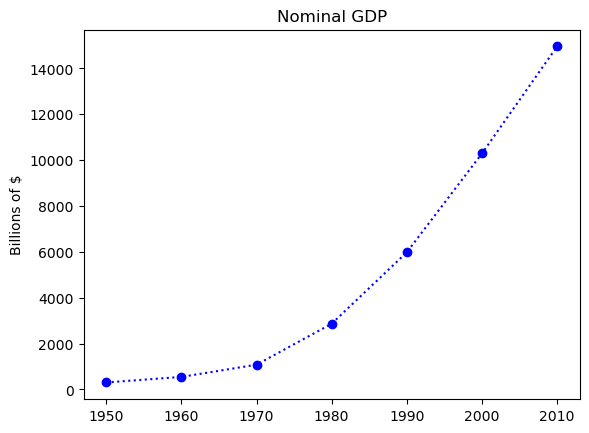

In [1]:
from matplotlib import pyplot as plt
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3] # create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='blue', marker='o', linestyle='dotted') # add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

# Bar Chart

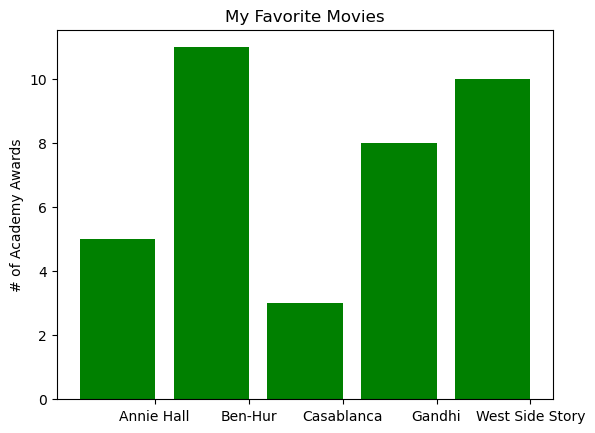

In [2]:

movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates # so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]
# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars, color='green')
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies) 
plt.show()

In [3]:
for i, _ in enumerate(movies):
    print(i + 0.1)

0.1
1.1
2.1
3.1
4.1


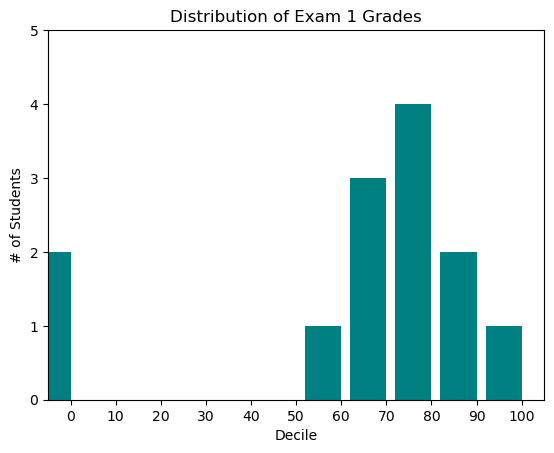

In [4]:
from collections import Counter
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0] 

decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)# Convert to Dictionary output (key, value) 
plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
        histogram.values(),                # give each bar its correct height
        8, color='teal')  
                                            # give each bar a width of 8
plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)]) 
plt.xlabel("Decile") # x-axis labels at 0, 10, ..., 100
plt.ylabel("# of Students") 
plt.title("Distribution of Exam 1 Grades") 
plt.show()

The third argument to plt.bar specifies the bar width. Here we chose a width of 8 
(which leaves a small gap between bars, since our buckets have width 10). And we shifted the bar 
left by 4, so that (for example) the “80” bar has its left and right sides at 76 and 84, and (hence) its 
center at 80.
The call to plt.axis indicates that we want the x-axis to range from -5 to 105 (so that the “0” and “100” 
bars are fully shown), and that the y-axis should range from 0 to 5.  And the call to plt.xticks puts x-axis 
labels at 0, 10, 20, ..., 100.

In [5]:
histogram = counter(decile )

NameError: name 'counter' is not defined

In [ ]:
histogram

In [ ]:
#This is for xticks
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256] 
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)] 
xs = [i for i, _ in enumerate(variance)]
# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'y-', label='variance') # green solid line 
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line 
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line
# because we've assigned labels to each series 
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

In [ ]:
for x,y in zip(variance, bias_squared):
    print(x,y)

In [ ]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
plt.scatter(friends, minutes)
# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes): 
    plt.annotate(label, xy=(friend_count, minute_count),  # put the label with its point 
        xytext=(5, -5), # but slightly offset 
        textcoords='offset points')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of Friends")
plt.ylabel("Daily Minutes Spent on the Site")
plt.show()

In [9]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [10]:
planets.head()
# ()tells the head to format in a more organized (chart) df without () the df looks...boring and text

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
import pandas as pd
birthsDF = pd.read_csv('desktop/births.csv.txt')
birthsDF.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
# let's add a decade column and take a look at the male and female births as a function of a decade
birthsDF['decade'] = 10 * (birthsDF['year'] // 10)
birthsDF.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

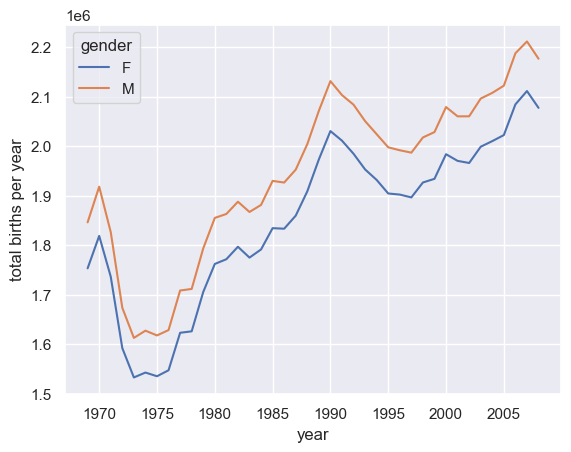

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use seaborn styles
birthsDF.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [14]:
import numpy as np
quartiles = np.percentile(birthsDF['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [15]:
#Distrubtion
birthsDF = birthsDF.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [16]:
birthsDF['day'] = birthsDF['day'].astype(int)

In [17]:
birthsDF.index = pd.to_datetime(10000 * birthsDF.year + 
                               100 * birthsDF.month +
                               birthsDF.day, format='%Y%m%d')
birthsDF['dayofweek'] = birthsDF.index.dayofweek

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
birthsDF.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

NameError: name 'birthsDF' is not defined

# Gaussian Disturbtion Function

#http://hyperphysics.phy-astr.gsu.edu/hbase/Math/gaufcn.html